# Data Frames in Python

<style> p { text-align: justify; } </style>

A data frame is a two-dimensional, size-mutable, and heterogeneous data structure. Think of it as a table or spreadsheet where rows represent records and columns represent variables or attributes. In Python, the `pandas.DataFrame` class is used to represent data frames.

Key characteristics of data frames:

- Columns can contain different data types (e.g., numeric, character, factor).
- Rows represent individual observations or cases.
- Data frames can hold large datasets efficiently.

## Creating Data Frames

A data frame can be created from various data types:

In [3]:
import pandas as pd

# Creating a data from a dictionary

data = {
    "Name": ["Amrit", "Ishwor", "Indra", "Rakshya"],
    "Age": [27, 24, 21, 25],
    "Grade": ["A", "B", "A", "B"],
    "Major": ["Maths", "Science", "Maths", "Science"]
}

df = pd.DataFrame(data)

# Display the data frame
print(df)

      Name  Age Grade    Major
0    Amrit   27     A    Maths
1   Ishwor   24     B  Science
2    Indra   21     A    Maths
3  Rakshya   25     B  Science


## Accessing and Modifying Data

**Selecting Rows and Columns**

We can access elements of a data frame using indexing, column names, or logical conditions.

In [4]:
# Access a column
print(df["Name"])

0      Amrit
1     Ishwor
2      Indra
3    Rakshya
Name: Name, dtype: object


In [5]:
# Access a row by index
print(df.loc[0])

Name     Amrit
Age         27
Grade        A
Major    Maths
Name: 0, dtype: object


In [11]:
# Access a specific value
value = df.at[2, "Name"]  # Using label-based indexing
print(value)

Indra


In [12]:
# Using position-based indexing
value = df.iloc[2, 0]  
print(value)

Indra


**Adding and Removing Columns**

We can add a new column to a data frame dynamically or remove an existing column.

In [13]:
# Add a column 'Pass' where students with Grade 'A' are True
df["Pass"] = df["Grade"] == "A"
print(df)

      Name  Age Grade    Major   Pass
0    Amrit   27     A    Maths   True
1   Ishwor   24     B  Science  False
2    Indra   21     A    Maths   True
3  Rakshya   25     B  Science  False


In [14]:
# Remove the 'Grade' column
df = df.drop(columns=["Grade"])
print(df)

      Name  Age    Major   Pass
0    Amrit   27    Maths   True
1   Ishwor   24  Science  False
2    Indra   21    Maths   True
3  Rakshya   25  Science  False


## Data Frame Operations

**Filtering and Subsetting**

We can filter rows based on conditions using logical operators.

In [15]:
# Filter rows where Age > 22
filtered_df = df[df["Age"] > 22]
print(filtered_df)

      Name  Age    Major   Pass
0    Amrit   27    Maths   True
1   Ishwor   24  Science  False
3  Rakshya   25  Science  False


**Sorting and Reordering**

Sorting a data frame is straightforward with the `sort_values()` method.

In [16]:
# Sort by the 'Age' column in ascending order
df_sorted = df.sort_values(by="Age", ascending=True)
print(df_sorted)

      Name  Age    Major   Pass
2    Indra   21    Maths   True
1   Ishwor   24  Science  False
3  Rakshya   25  Science  False
0    Amrit   27    Maths   True


**Summary and Statistical Functions**

The `.describe()` method in pandas provides a summary of each column in a DataFrame. Here's how:

In [18]:
# Summary of the DataFrame (Descriptive statistics)
print(df.describe())

         Age
count   4.00
mean   24.25
std     2.50
min    21.00
25%    23.25
50%    24.50
75%    25.50
max    27.00


In [19]:
# Get number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 4
Number of columns: 4


**Aggregation and Grouping**

The `groupby` method in pandas along with aggregation functions enable aggregation and grouping.

In [20]:
# Group by 'Major' and calculate the average age
grouped_df = df.groupby("Major").agg(Average_Age=("Age", "mean")).reset_index()

print(grouped_df)

     Major  Average_Age
0    Maths         24.0
1  Science         24.5


- `groupby` groups the data frame by the 'Major' column
- `agg` applies the mean function to the 'Age' column and renames the result to 'Average_Age'
- `reset_index()` resets the index so the grouped column "Major" becomes a regular column in the resulting data frame.

So far, this chapter has introduced you to the versatility and power of data frames in Python, laying the foundation for data manipulation and analysis. Now, we will delve into data frames specifically designed for geospatial data.

## Geospatial Data Frames

A Geospatial Data Frame (GeoDataFrame) extends a standard data frame by incorporating a geometry column that holds spatial data, such as points, lines, and polygons. This combination of spatial and attribute data makes geospatial data frames particularly useful for spatial analysis and mapping.

In Python, the `GeoPandas` library is often used to handle geospatial data frames, providing easy-to-use structures for working with vector data and offering compatibility with other libraries for geospatial and statistical analysis.

The geometry is a key component of geospatial data frames, defining the spatial features for each observation. Each row represents a spatial feature linked to its attributes, and the geometry column typically stores spatial data in formats such as GeoJSON, WKT (Well-Known Text), or binary formats like WKB (Well-Known Binary).

### Creating GDF

You can create a geospatial data frame using `GeoPandas`. Here’s an example:

In [21]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Create a data frame with spatial data
data = {
    "Name": ["Point A", "Point B", "Point C"],
    "Latitude": [27.7, 28.2, 26.9],
    "Longitude": [85.3, 84.9, 83.8]
}

df = pd.DataFrame(data)

# Convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_data = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS 84
geo_data.set_crs(epsg=4326, inplace=True)

# Print the GeoDataFrame
print(geo_data)

      Name  Latitude  Longitude           geometry
0  Point A      27.7       85.3  POINT (85.3 27.7)
1  Point B      28.2       84.9  POINT (84.9 28.2)
2  Point C      26.9       83.8  POINT (83.8 26.9)


### Manipulating GDF

**Spatial Queries**

Geospatial data frames support operations like spatial filtering and proximity analysis.

In [22]:
from shapely.geometry import box

# Define a bounding box and convert it to a geometry object
bbox = box(84, 27, 86, 29)  # xmin, ymin, xmax, ymax
bbox_polygon = gpd.GeoSeries([bbox], crs="EPSG:4326")

# Filter points within the bounding box
filtered_data = geo_data[geo_data.geometry.within(bbox_polygon.iloc[0])]

# Print filtered data
print(filtered_data)

      Name  Latitude  Longitude           geometry
0  Point A      27.7       85.3  POINT (85.3 27.7)
1  Point B      28.2       84.9  POINT (84.9 28.2)


**Attribute-Based Operations**

Just like standard data frames, we can manipulate attributes in geospatial data frames.

In [23]:
# Add a new column for Elevation
geo_data['Elevation'] = [1500, 2000, 1700]

# Print the updated GeoDataFrame
print(geo_data)

      Name  Latitude  Longitude           geometry  Elevation
0  Point A      27.7       85.3  POINT (85.3 27.7)       1500
1  Point B      28.2       84.9  POINT (84.9 28.2)       2000
2  Point C      26.9       83.8  POINT (83.8 26.9)       1700


### Visualization of GDF

Geospatial data frames can be visualized using the `matplotlib` library.

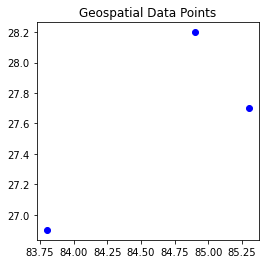

In [24]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
geo_data.plot(marker='o', color='blue', legend=True)
plt.title("Geospatial Data Points")
plt.show()

Geospatial data frames bridge the gap between tabular data and spatial analysis, making them indispensable for modern geospatial workflows. Their versatility, combined with Python’s ecosystem of geospatial libraries, provides an efficient and intuitive way to analyze and visualize spatial data.

## Polygon GeoDataFrame

In Python, the `GeoDataFrame` from the `GeoPandas` library is used to represent vector-based spatial data. A GeoDataFrame combines both *spatial* and *tabular* data, making it ideal for spatial analysis and data manipulation. It is essentially a data frame with a special geometry column that contains spatial data, such as points, lines, and polygons.

With a GeoDataFrame, you can perform typical data manipulation tasks, such as filtering, summarizing, and joining, on the tabular data. At the same time, it allows for spatial operations like plotting, spatial indexing, and spatial joins. The **tabular** portion of a GeoDataFrame allows you to perform standard data frame operations (like groupby, sort, merge), while the geometry column enables you to carry out spatial analysis and visualization.

This section will focus on working with geospatial data, such as the vector data for the Kanchanpur district in Nepal, available in GeoPackage (.gpkg) format. You can download this data, load it using GeoPandas, and perform both spatial and tabular operations. The GeoDataFrame provides a powerful tool for handling, analyzing, and visualizing geographic data, seamlessly integrating both spatial and non-spatial aspects of analysis.

### Structure

The vector GeoDataFrame contains both the geometry column and attribute data.

In [26]:
import geopandas as gpd

# Import the GeoDataFrame
vector_data = gpd.read_file("data/vector/kanchanpur.gpkg")

# View the structure of the GeoDataFrame
print(vector_data.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME      21 non-null     object  
 1   geometry  21 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 464.0+ bytes
None


In [27]:
# Display the first few rows
print(vector_data.head())

           NAME                                           geometry
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...


### Adding New Columns

In Python, you can add a new column to a GeoDataFrame in a similar way you would add it to a regular DataFrame using `pandas`.

In [28]:
# Add a new column - Population
vector_data['Population'] = [
    37900, 46565, 72813, 49223, 52221, 64436, 40823,
    97216, 36368, 277108, 51835, 38199, 46773, 44571,
    48838, 11581, 131, 19211, 56755, 58257, 37573
]

# Display the updated GeoDataFrame
print(vector_data.head())

           NAME                                           geometry  Population
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...       37900
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...       46565
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...       72813
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...       49223
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...       52221


### Arithmetic Computation

In Python, you can calculate the area of each geometry in a `GeoDataFrame` and create a new column for population density as follows:

In [31]:
# Reproject vector data to a projected CRS (e.g., UTM zone 45N for this area)
vector_data = vector_data.to_crs(epsg=32645)

# Calculate the area of each district (in square meters)
vector_data['area_m2'] = vector_data.geometry.area

# Convert the area from square meters to square kilometers
vector_data['area_km2'] = vector_data['area_m2'] / 1e6

# Add a new column with density (population/area)
vector_data['Density'] = vector_data['Population'] / vector_data['area_km2']

# Display the updated GeoDataFrame
print(vector_data[['NAME', 'Population', 'area_km2', 'Density']].head())

           NAME  Population    area_km2      Density
0  BaisiBichawa       37900   74.476642   508.884384
1      Beldandi       46565   24.906232  1869.612393
2      Chandani       72813   32.517201  2239.214842
3        Daijee       49223  102.823123   478.715280
4   Dekhatbhuli       52221   91.109522   573.167312


### Selecting and Filtering

You can filter the data using `GeoDataFrame` from `geopandas`. Here's how you can select specific columns and display the first few rows:

In [32]:
# Select specific columns (e.g., "NAME" and "Population")
selected_data = vector_data[['NAME', 'Population']]

# Display the first few rows
print(selected_data.head())

           NAME  Population
0  BaisiBichawa       37900
1      Beldandi       46565
2      Chandani       72813
3        Daijee       49223
4   Dekhatbhuli       52221


In [37]:
# Filter rows where Population is greater than 60,000
filtered_data = vector_data[vector_data['Population'] > 60000]

# Display the filtered data (similar to tibble in R)
print(filtered_data[['NAME', 'Population', 'Density', 'area_km2']])

       NAME  Population      Density   area_km2
2  Chandani       72813  2239.214842  32.517201
5   Dodhara       64436  2591.163947  24.867589
7    Kalika       97216  3789.177761  25.656226
9  Laxmipur      277108  9518.765708  29.111758


### Grouping and Summarizing

Grouping and summarizing operations are common in data analysis. You can group data based on an attribute and calculate summary statistics for each group.

In [42]:
# Group by 'NAME' and calculate the total population and average density
region_summary = vector_data.groupby('NAME').agg(
    total_population=('Population', 'sum'),
    average_density=('Density', 'mean')
).reset_index()

# Display the result
print(region_summary)

                  NAME  total_population  average_density
0         BaisiBichawa             37900       508.884384
1             Beldandi             46565      1869.612393
2             Chandani             72813      2239.214842
3               Daijee             49223       478.715280
4          Dekhatbhuli             52221       573.167312
5              Dodhara             64436      2591.163947
6              Jhalari             40823       332.137920
7               Kalika             97216      3789.177761
8           Krishnapur             36368       218.213683
9             Laxmipur            277108      9518.765708
10   MahendranagarN.P.             51835       299.845566
11             Parasan             38199      1004.067157
12            Pipaladi             46773      1087.800781
13     RaikawarBichawa             44571       545.906632
14      RampurBilaspur             48838      1236.669117
15      RauteliBichawa             11581       382.064494
16  Royal Shuk

- `groupby('NAME')`: Groups the GeoDataFrame by the NAME column, which represents different villages in Kanchanpur district.
- `agg()`: Used to specify the aggregation functions. Here, it calculates the sum of `Population` and the mean of `Density`.
- `reset_index()`: Resets the index after the grouping operation to make sure the resulting `DataFrame` is formatted properly.

### Pivoting and Reshaping

In Python, you can achieve pivoting and reshaping using pandas.

In [47]:
# Drop geometry column and pivot data into long format
long_format = vector_data.drop(columns='geometry') \
                         .melt(id_vars=["NAME"], value_vars=["Population", "Density"], 
                               var_name="attribute", value_name="value")

# Display the first and middle few rows of the reshaped DataFrame
print(long_format.iloc[[0,1,2,21,22,23], :])

            NAME   attribute         value
0   BaisiBichawa  Population  37900.000000
1       Beldandi  Population  46565.000000
2       Chandani  Population  72813.000000
21  BaisiBichawa     Density    508.884384
22      Beldandi     Density   1869.612393
23      Chandani     Density   2239.214842


- `drop(columns='geometry')`: This removes the geometry column since it’s not needed for reshaping the tabular data.
- `melt()`: This function is used to pivot data from wide to long format.

### Visualization

To plot the population density from a GeoDataFrame using `matplotlib` and `geopandas`, you can do the following:

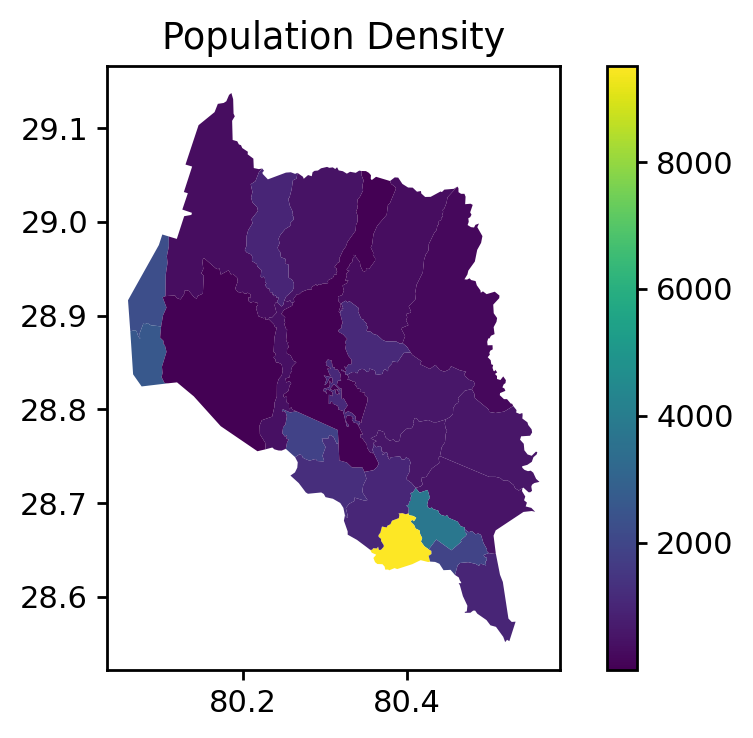

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Reproject vector data to a projected CRS (e.g., UTM zone 45N for this area)
vector_data = vector_data.to_crs(epsg=4326)

# Plot the Population Density
vector_data.plot(column='Density', cmap='viridis', legend=True)
plt.title("Population Density")
plt.show()
